In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("Advertising.csv")

In [4]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
df.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [8]:
df.drop(['Unnamed: 0'], axis=1)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


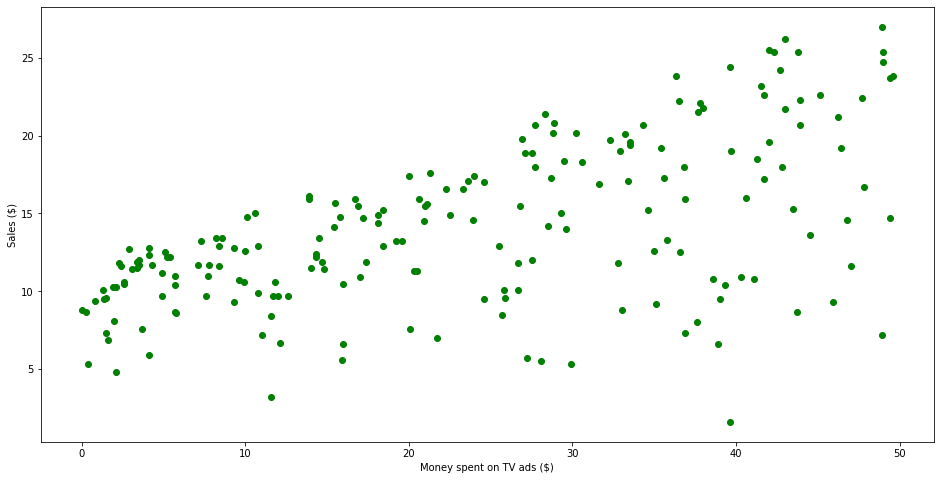

In [24]:
plt.figure(figsize=(16,8))
plt.scatter(
    df['Radio'],
    df['Sales'],
    c='green'
)
plt.xlabel('Money spent on TV ads ($)')
plt.ylabel('Sales ($)')
plt.show()

In [25]:
X = df['Radio'].values.reshape(-1,1)
y = df['Sales'].values.reshape(-1,1)

lr = LinearRegression()
lr.fit(X, y)

print("The linear model is: Y = {:.5} + {:.5}X".format(lr.intercept_[0], lr.coef_[0][0]))

The linear model is: Y = 9.3116 + 0.2025X


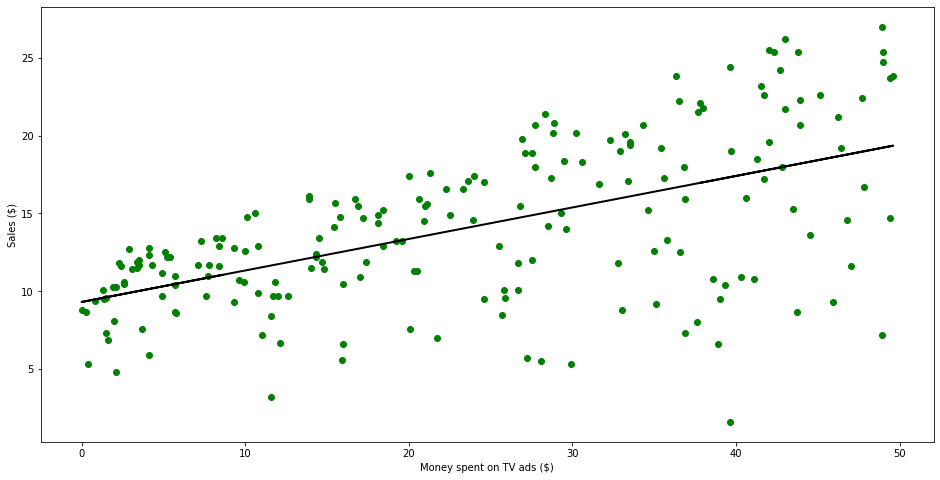

In [26]:
predictions = lr.predict(X)

plt.figure(figsize=(16, 8))

plt.scatter(
    df['Radio'],
    df['Sales'],
    c='green'
)

plt.plot(
    df['Radio'],
    predictions,
    c='black',
    linewidth=2
)

plt.xlabel("Money spent on TV ads ($)")
plt.ylabel("Sales ($)")
plt.show()

In [27]:
def predict_sales_value(tv_ads_value):
    return 7.0326 + (0.047537 * tv_ads_value)

In [31]:
predict_sales_value(40)

8.93408

In [30]:
predict_sales_value(10)

7.50797

In [32]:
##Multiple Items Prediction

In [33]:
Xs = df.drop(['Sales','Unnamed: 0'], axis=1)
y = df['Sales'].values.reshape(-1,1)
lrm = LinearRegression()
lrm.fit(Xs, y)
print("The linear model is: Sales = {:.5} + {:.5}*TV + {:.5}*radio + {:.5}*newspaper".format(lrm.intercept_[0], lrm.coef_[0][0], lrm.coef_[0][1], lrm.coef_[0][2]))

The linear model is: Sales = 2.9389 + 0.045765*TV + 0.18853*radio + -0.0010375*newspaper


In [34]:
def predict_sales_value_multivariate(tv_value, radio_value, newspaper_value):
    return 2.9389 + (0.045765 * tv_value) + (0.18853 * radio_value) - (0.0010375 * newspaper_value)

In [37]:
predict_sales_value_multivariate(250, 40, 80.2)

21.8381425

In [38]:
predict_sales_value_multivariate(50, 30, 40)

10.841550000000002